In [348]:
import numpy as np
import matplotlib.pyplot as plt

In [349]:
def winner(x, w):
    ind = [np.inf, np.inf]
    for i in range(len(w)):
        dist = np.dot((x-w[i]), (x-w[i]))
        if dist < ind[1]:
            ind = [i, dist]
    return ind[0]

def weight_update(x, w_i, eta=0.2):
    w_i_new = w_i + eta * (x - w_i)
    return w_i_new

def nearest_neighbours(i, n, len):
    min_ind = max(0, i-n)
    max_ind = min(len-1, i+n)
    return list(range(min_ind,max_ind+1))


def nearest_neighbours_cyclic(i, n, len):
    neighbors = []
    for j in range(i - n, i + n + 1):
        neighbor_index = j % len
        neighbors.append(neighbor_index)
    return neighbors


def neighbours_manhattan(index, n, grid_size=10):
    row_length = grid_size
    neighbors = []
    for i in range(grid_size * grid_size):
        row_index = i // row_length
        col_index = i % row_length

        manhattan_dist = abs(row_index - index // row_length) + abs(col_index - index % row_length)

        if manhattan_dist <= n:
            neighbors.append(i)
    return neighbors

# 4.1 Topological Ordering of Animal Species

In [350]:
with open('animals.dat', 'r') as file:
    data = file.read().strip().split(',')
data_array = np.array(data).astype(int)
data_animals = data_array.reshape(32, 84)


with open('animalnames.txt', 'r') as file:
    lines = file.readlines()

animal_names = [line.strip().replace("'","") for line in lines]

In [363]:
weights = np.random.rand(100, 84)

neighbours = 50
output_dim = 100
epochs = 20

ordering = []

for epoch in range(epochs):
    for animal in data_animals:
        winner_ind = winner(animal, weights)
        neighbourhood = nearest_neighbours(winner_ind, np.round(neighbours*0.78**epoch).astype(int), output_dim)
        for n in neighbourhood:
            weights[n] = weight_update(animal, weights[n])
for animal in data_animals:
    winner_ind = winner(animal, weights)
    ordering.append(winner_ind)

combined_lists = list(zip(ordering, animal_names))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])
sorted_animals = [item[1] for item in sorted_combined_lists]

print(sorted_animals)
print(sorted_combined_lists)
print(len(sorted_animals))

['pig', 'camel', 'giraffe', 'horse', 'antelop', 'kangaroo', 'rabbit', 'elephant', 'bat', 'rat', 'ape', 'lion', 'cat', 'skunk', 'dog', 'hyena', 'bear', 'walrus', 'frog', 'crocodile', 'seaturtle', 'ostrich', 'penguin', 'duck', 'pelican', 'spider', 'housefly', 'moskito', 'butterfly', 'grasshopper', 'beetle', 'dragonfly']
[(0, 'pig'), (2, 'camel'), (3, 'giraffe'), (6, 'horse'), (9, 'antelop'), (12, 'kangaroo'), (15, 'rabbit'), (18, 'elephant'), (21, 'bat'), (24, 'rat'), (27, 'ape'), (30, 'lion'), (32, 'cat'), (35, 'skunk'), (38, 'dog'), (41, 'hyena'), (43, 'bear'), (46, 'walrus'), (51, 'frog'), (55, 'crocodile'), (59, 'seaturtle'), (64, 'ostrich'), (68, 'penguin'), (72, 'duck'), (75, 'pelican'), (80, 'spider'), (84, 'housefly'), (88, 'moskito'), (93, 'butterfly'), (96, 'grasshopper'), (98, 'beetle'), (99, 'dragonfly')]
32


# 4.2 Cyclic Tour

In [395]:
with open('cities.dat', 'r') as file:
    lines = file.readlines()[3:]


coordinates = []
for line in lines:
    line = line.strip().rstrip(';')
    parts = line.split(',')
    if len(parts) >= 2:
        x_str, y_str = parts
        x = float(x_str)
        y = float(y_str)
        coordinates.append([x, y])


coordinates = np.array(coordinates)



In [402]:
weights = np.random.rand(10, 2)
neighbours = 2
output_dim = 10
epochs = 20

ordering = []

for epoch in range(epochs):
    for coord in coordinates:
        winner_ind = winner(coord, weights)
        neighbourhood = nearest_neighbours_cyclic(winner_ind, neighbours, output_dim)
        for n in neighbourhood:
            weights[n] = weight_update(coord, weights[n])

    if epoch == 10:
        neighbours = 1
    if epoch == 15:
        neighbours = 0

for coord in coordinates:
    winner_ind = winner(coord, weights)
    ordering.append(winner_ind)

combined_lists = list(zip(ordering, coordinates))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])
sorted_coords = [item[1] for item in sorted_combined_lists]




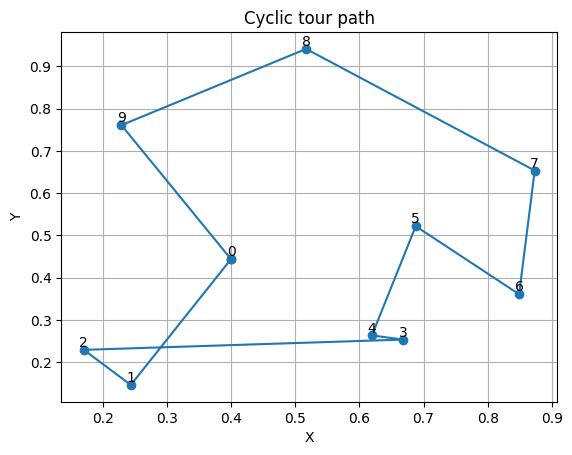

In [403]:

for i, (x, y) in enumerate(sorted_coords):
    plt.text(x, y, str(i), ha='center', va='bottom')
sorted_coords.append(sorted_coords[0])
x_coords = [point[0] for point in sorted_coords]
y_coords = [point[1] for point in sorted_coords]

plt.plot(x_coords, y_coords, marker='o', linestyle='-')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Cyclic tour path')
plt.grid(True)


w_x = []
w_y = []
for i in range(len(weights)):
    w_x.append(weights[i][0])
    w_y.append(weights[i][1])

#plt.scatter(w_x, w_y, c='red')

plt.show()

# 4.3 Data Clustering: Votes of MPs

In [224]:
with open('votes.dat', 'r') as file:
    data = file.read().strip().split(',')
data_array = np.array(data).astype(float)
data_votes = data_array.reshape(349, 31)

In [300]:
with open('mpsex.dat', 'r') as file:
    lines = file.readlines()[2:]
mp_sex = [int(line.strip().replace("'","")) for line in lines]


with open('mpparty.dat', 'r') as file:
    lines = file.readlines()[3:]
mp_party = [int(line.strip().replace("'","")) for line in lines]

with open('mpdistrict.dat', 'r') as file:
    lines = file.readlines()
mp_district = [int(line.strip().replace("'","")) for line in lines]


print(len(mp_district))

349


In [245]:

weights = np.random.rand(100, 31)
neighbours = 5
output_dim = 100
epochs = 20

ordering = []

for epoch in range(epochs):
    for votes in data_votes:
        winner_ind = winner(votes, weights)
        neighbourhood = neighbours_manhattan(winner_ind, neighbours, int(np.sqrt(output_dim)))
        for n in neighbourhood:
            weights[n] = weight_update(votes, weights[n])

    neighbours = neighbours*0.8

for votes in data_votes:
    winner_ind = winner(votes, weights)
    ordering.append(winner_ind)


combined_lists = list(zip(ordering, mp_sex))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])
sorted_mp_sex = [item[1] for item in sorted_combined_lists]

combined_lists = list(zip(ordering, mp_district))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])
sorted_mp_district = [item[1] for item in sorted_combined_lists]

combined_lists = list(zip(ordering, mp_party))
sorted_combined_lists = sorted(combined_lists, key=lambda x: x[0])
sorted_mp_party = [item[1] for item in sorted_combined_lists]


In [294]:
values = ordering
grid_size = 10

coordinates = []
for value in values:
    x = value % grid_size + np.random.uniform(-0.3, 0.3)
    y = value // grid_size + np.random.uniform(-0.3, 0.3)
    coordinates.append((x, y))


x_values, y_values = zip(*coordinates)

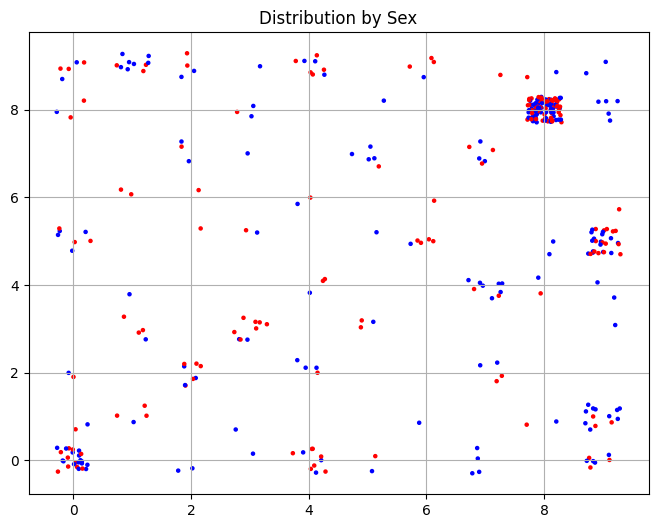

In [373]:

colors = ['blue' if binary == 0 else 'red' for binary in mp_sex]
plt.figure(figsize=(8, 6))
plt.scatter(x_values, y_values, c=colors, s=5)

# Add labels and title

plt.title('Distribution by Sex')

plt.grid(True)
plt.show()



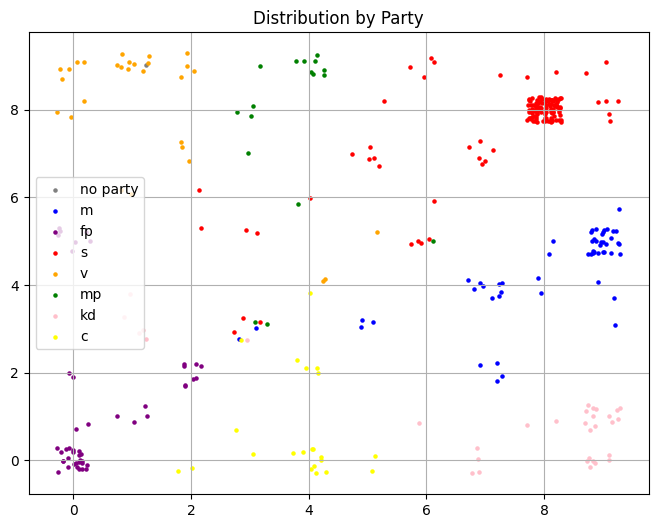

In [375]:

party_coordinates = {
    0: ([], [], 'gray', 'no party'),
    1: ([], [], 'blue', 'm'),
    2: ([], [], 'purple', 'fp'),
    3: ([], [], 'red', 's'),
    4: ([], [], 'orange', 'v'),
    5: ([], [], 'green', 'mp'),
    6: ([], [], 'pink', 'kd'),
    7: ([], [], 'yellow', 'c')
}

# Group coordinates by party
for i, party in enumerate(mp_party):
    x = x_values[i]
    y = y_values[i]
    party_coordinates[party][0].append(x)
    party_coordinates[party][1].append(y)

# Create scatter plot for each party
plt.figure(figsize=(8, 6))
for coords, (x, y, color, label) in party_coordinates.items():
    plt.scatter(x, y, c=color, s=5, label=label)

# Add labels and title

plt.title('Distribution by Party')
plt.legend(loc='center left')

plt.grid(True)
plt.show()


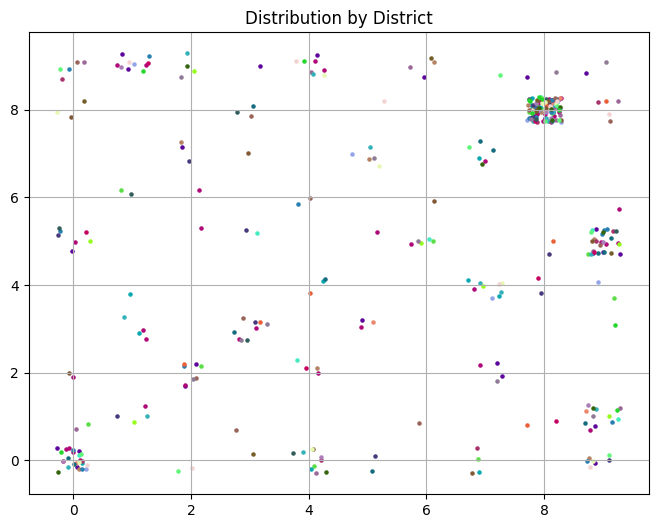

In [376]:

party_coordinates = {
    0: ([], []),
    1: ([], []),
    2: ([], []),
    3: ([], []),
    4: ([], []),
    5: ([], []),
    6: ([], []),
    7: ([], []),
    8: ([], []),
    9: ([], []),
    10: ([], []),
    11: ([], []),
    12: ([], []),
    13: ([], []),
    14: ([], []),
    15: ([], []),
    16: ([], []),
    17: ([], []),
    18: ([], []),
    19: ([], []),
    20: ([], []),
    21: ([], []),
    22: ([], []),
    23: ([], []),
    24: ([], []),
    25: ([], []),
    26: ([], []),
    27: ([], []),
    28: ([], []),
    29: ([], [])
}

for i, party in enumerate(mp_district):
    x = x_values[i]
    y = y_values[i]
    party_coordinates[party][0].append(x)
    party_coordinates[party][1].append(y)

plt.figure(figsize=(8, 6))
for coords, (x, y) in party_coordinates.items():
    color = np.random.rand(3,)
    plt.scatter(x, y, c=[color], s=5)


plt.title('Distribution by District')

plt.grid(True)
plt.show()
